# Optimized Motor Carrier Selection at WestVaco

#### Yu Mao 
#### October 20, 2020

## Introduction

In this case study, we are helping carriers from the paper mill to minimize the total shipping cost to 12 destinations that they serve. There are multiple constraints in order to find the optimized function and different cities have different stops, trips and miles, and each carriers have different truckloads in the transportation. Thus, our goal in this study is to optimize the lowest possible cost to help carriers with the necessary truckloads requirements. 

Yu Mao

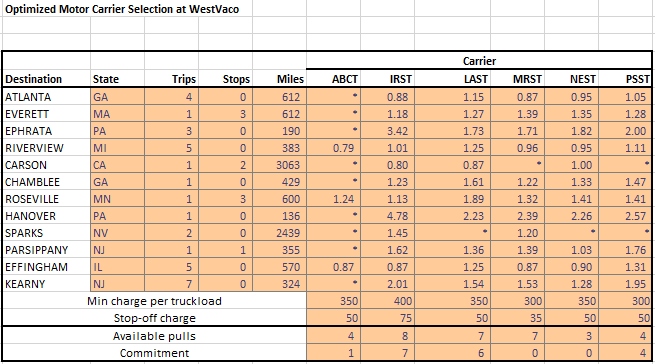

## Model 

In [57]:
from gurobipy import *
m = Model("Motor Carrier Selection at WestVaco")

### Data

In [58]:
Destination = 12
Trips = [4, 1, 3, 5, 1, 1, 1, 1, 2, 1, 5, 7]
AvailablePulls = [4, 8, 7, 7, 3, 4]
Commitment = [1, 7, 6, 0, 0, 4]

In [59]:
import pandas as pd
Carrier = pd.read_excel('Mao-Westvaco.xlsx', sheet_name = 'Carrier')
Carrier

,ABCT,IRST,LAST,MRST,NEST,PSST
0,99999.0,538.56,703.80,532.44,581.40,642.60
1,99999.0,947.16,927.24,955.68,976.20,933.36
2,99999.0,649.80,350.00,324.90,350.00,380.00
3,350.0,400.00,478.75,367.68,363.85,425.13
4,99999.0,2600.40,2764.81,99999.00,3163.00,99999.00
5,99999.0,527.67,690.69,523.38,570.57,630.63
6,894.0,903.00,1284.00,897.00,996.00,996.00
7,99999.0,650.08,350.00,325.04,350.00,349.52
8,99999.0,3536.55,99999.00,2926.80,99999.00,99999.00
9,99999.0,650.10,532.80,528.45,415.65,674.80


### Decision Variables

In [60]:
ABCT = []
IRST = []
LAST = []
MRST = []
NEST = []
PSST = []

for i in range(Destination):
    ABCT.append('Carrier Selection {} ABCT'.format(i))
    IRST.append('Carrier Selection {} IRST'.format(i))
    LAST.append('Carrier Selection {} LAST'.format(i))
    MRST.append('Carrier Selection {} MRST'.format(i))
    NEST.append('Carrier Selection {} NEST'.format(i))
    PSST.append('Carrier Selection {} PSST'.format(i))

A = []
B = []
C = []
D = []
E = []
F = []

for i in range(Destination):
    A.append(m.addVar(vtype = GRB.INTEGER, lb=0.0, name = ABCT[i]))
    B.append(m.addVar(vtype = GRB.INTEGER, lb=0.0, name = IRST[i]))
    C.append(m.addVar(vtype = GRB.INTEGER, lb=0.0, name = LAST[i]))
    D.append(m.addVar(vtype = GRB.INTEGER, lb=0.0, name = MRST[i]))
    E.append(m.addVar(vtype = GRB.INTEGER, lb=0.0, name = NEST[i]))
    F.append(m.addVar(vtype = GRB.INTEGER, lb=0.0, name = PSST[i]))

m.update()

### Objective

In [61]:
TotalCost = [quicksum(Carrier.ABCT.values*A), quicksum(Carrier.IRST.values*B), quicksum(Carrier.LAST.values*C),
             quicksum(Carrier.MRST.values*D), quicksum(Carrier.NEST.values*E), quicksum(Carrier.PSST.values*F)]

m.setObjective(quicksum(TotalCost),GRB.MINIMIZE)

m.update()

In [62]:
TotalCost

[<gurobi.LinExpr: 99999.0 Carrier Selection 0 ABCT + 99999.0 Carrier Selection 1 ABCT + 99999.0 Carrier Selection 2 ABCT + 350.0 Carrier Selection 3 ABCT + 99999.0 Carrier Selection 4 ABCT + 99999.0 Carrier Selection 5 ABCT + 894.0 Carrier Selection 6 ABCT + 99999.0 Carrier Selection 7 ABCT + 99999.0 Carrier Selection 8 ABCT + 99999.0 Carrier Selection 9 ABCT + 495.9 Carrier Selection 10 ABCT + 99999.0 Carrier Selection 11 ABCT>,
 <gurobi.LinExpr: 538.5600000000001 Carrier Selection 0 IRST + 947.16 Carrier Selection 1 IRST + 649.8 Carrier Selection 2 IRST + 400.0 Carrier Selection 3 IRST + 2600.4 Carrier Selection 4 IRST + 527.67 Carrier Selection 5 IRST + 902.9999999999999 Carrier Selection 6 IRST + 650.08 Carrier Selection 7 IRST + 3536.5499999999997 Carrier Selection 8 IRST + 650.1 Carrier Selection 9 IRST + 495.9 Carrier Selection 10 IRST + 651.2399999999999 Carrier Selection 11 IRST>,
 <gurobi.LinExpr: 703.8 Carrier Selection 0 LAST + 927.24 Carrier Selection 1 LAST + 350.0 Carrie

### Constraints

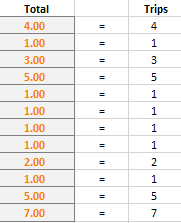

In [63]:
m.remove(m.getConstrs())

TotalAssigned = [A[i]+B[i]+C[i]+D[i]+E[i]+F[i] for i in range(Destination)]

SumABCT = quicksum(A)
SumIRST = quicksum(B)
SumLAST = quicksum(C)
SumMRST = quicksum(D)
SumNEST = quicksum(E)
SumPSST = quicksum(F)

for i in range(Destination):
    m.addConstr(TotalAssigned[i], GRB.EQUAL, Trips[i], "Total")

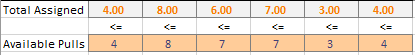

In [64]:
m.addConstr(SumABCT, GRB.LESS_EQUAL, AvailablePulls[0], "Assignment")
m.addConstr(SumIRST, GRB.LESS_EQUAL, AvailablePulls[1], "Assignment")
m.addConstr(SumLAST, GRB.LESS_EQUAL, AvailablePulls[2], "Assignment")
m.addConstr(SumMRST, GRB.LESS_EQUAL, AvailablePulls[3], "Assignment")
m.addConstr(SumNEST, GRB.LESS_EQUAL, AvailablePulls[4], "Assignment")
m.addConstr(SumPSST, GRB.LESS_EQUAL, AvailablePulls[5], "Assignment")

<gurobi.Constr *Awaiting Model Update*>

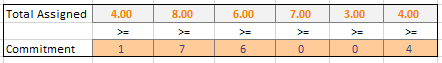

In [65]:
m.addConstr(SumABCT, GRB.GREATER_EQUAL, Commitment[0], "Assignment")
m.addConstr(SumIRST, GRB.GREATER_EQUAL, Commitment[1], "Assignment")
m.addConstr(SumLAST, GRB.GREATER_EQUAL, Commitment[2], "Assignment")
m.addConstr(SumMRST, GRB.GREATER_EQUAL, Commitment[3], "Assignment")
m.addConstr(SumNEST, GRB.GREATER_EQUAL, Commitment[4], "Assignment")
m.addConstr(SumPSST, GRB.GREATER_EQUAL, Commitment[5], "Assignment")

m.update()

### Optimization

In [66]:
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 24 rows, 72 columns and 216 nonzeros
Model fingerprint: 0x0a314918
Variable types: 0 continuous, 72 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+02, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 8e+00]
Found heuristic solution: objective 422096.92000
Presolve removed 3 rows and 0 columns
Presolve time: 0.00s
Presolved: 21 rows, 72 columns, 180 nonzeros
Variable types: 0 continuous, 72 integer (36 binary)

Root relaxation: objective 2.239438e+04, 26 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    22394.380000 22394.3800  0.00%     -    0s

Explored 0 nodes (26 simplex iterations) in 0.01 seconds
Thread count was 16 (of 16 available processors)

Solution count 2: 22394.4 422097 

### Results

In [67]:
import pandas as pd
Result = pd.read_excel('Mao-Westvaco.xlsx', sheet_name = 'Result')
Result

,Destination,ABCT,IRST,LAST,MRST,NEST,PSST
0,ATLANTA,0,0,0,4,0,0
1,EVERETT,0,0,0,0,0,1
2,EPHRATA,0,0,1,0,0,2
3,RIVERVIEW,4,0,0,1,0,0
4,CARSON,0,1,0,0,0,0
5,CHAMBLEE,0,1,0,0,0,0
6,ROSEVILLE,0,1,0,0,0,0
7,HANOVER,0,0,0,0,0,1
8,SPARKS,0,0,0,2,0,0
9,PARSIPPANY,0,0,0,0,1,0


In [74]:
print(f"The minimum total cost for the optimal solution is ${m.objVal:,.2f}\n")

The minimum total cost for the optimal solution is $22,394.38



## Recommendation

After the analysis of the optimization model, I would recommend ABCT to make 4 trips to Riverview; IRST carriers should make 1 trip to Carson, 1 trip to Chamblee, 1 trip to Roseville, and 5 trips to Effingham. Also, LAST carriers should make 1 trip to Ephrata, and 5 trips to Kearny; MRST should make 4 trips to Atlanta, 1 trip to Riverview, 2 trips to Sparks. Furthermore, NEST carriers should make 1 trip to Parsippany, and 2 trips in Kearny. Last but not least, PSST carrier is supposed to make 1 trip to Everett, 2 trips to Ephrata, and 1 trip to Hanover. Each cities end up with at least one trip from the carriers and this gives the most optimized solution, which ends up beings $22394.38. 

## Approach and Challenges

There were several challenges during my analysis in the optimization model. I was not sure about the objective fuctions at first due to the uncertainty of the total cost function. Afterwards, I was trying to use for loop for the constraints, but ended up listing all the constraints to have more clearity. However, this case study is definitely doable and requires a lot of understandings in order to find the most optimal way to code. 

<br><br><br>
<span style="font-size:10px"> Yu Mao - 2020-Oct-20<-span>